# Does America Agree That "The Empire Strikes Back" is the Best Star Wars Movie?

**For this analysis, we will be using a survey by FiveThirtyEight with a total of 835 responses to answer the following question:**
* **"Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"**

**We will also answer these secondary questions:**
* How many respondants have seen each film in the franchise?
* Which film is the best ranked?
* Which film is the worst ranked?
* Which gender is more likely to watch Star Wars?
* Does gender play a role in movie rankings?
* How many respondants consider themselves fans?
* What is the movie ranking difference between fans and non-fans who have seen the films?
* Does Education level have any correlation with having seen the movies?
* Does Education level affect the movie rankings?
* Who do respondants think shot first: Han Solo or Greedo?
* Which characters are the most favorable?
* Which characters are the least favorable?
* Which characters are the most controversial (both favorable and unfavorable)

You can find this dataset here https://github.com/fivethirtyeight/data/tree/master/star-wars-survey if you'd like to download and check it out for yourself.

## Importing and Exploring the Data

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
#Separating row 0 which is additional info for the column names and type of responses:
headings = star_wars.iloc[0]
star_wars = star_wars[1:]
print (headings)

RespondentID                                                                                                                                                                              NaN
Have you seen any of the 6 films in the Star Wars franchise?                                                                                                                         Response
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                                                                Response
Which of the following Star Wars films have you seen? Please select all that apply.                                                                  Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                                                                                        Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                        

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Removing NaN Values from 'RespondentID'

In [5]:
star_wars['RespondentID'] = star_wars['RespondentID'].notnull()

In [6]:
cols_missing_values = star_wars.columns[star_wars.isnull().sum() > 0]
cols_missing_values

Index(['Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
 

## Converting "Yes" and "No" columns to "True" and "False" (boolean) values

In [7]:
yes_no_cols = [1,2,30,31,32]

for i in yes_no_cols:
    print (star_wars.columns[i])
    print (star_wars[star_wars.columns[i]].value_counts(dropna=False))
    print('\n')

Have you seen any of the 6 films in the Star Wars franchise?
Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


Do you consider yourself to be a fan of the Star Wars film franchise?
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


Are you familiar with the Expanded Universe?
No     615
NaN    358
Yes    213
Name: Are you familiar with the Expanded Universe?, dtype: int64


Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦
NaN    973
No     114
Yes     99
Name: Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦, dtype: int64


Do you consider yourself to be a fan of the Star Trek franchise?
No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64




In [8]:
#renaming a column with strange characters
star_wars.rename(columns={'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦':'Do you consider yourself to be a fan of the Expanded Universe?'}, inplace=True)

In [9]:
yes_no = {"Yes": True,
          "No": False}
for i in yes_no_cols:
    star_wars[star_wars.columns[i]] = star_wars[star_wars.columns[i]].map(yes_no)
    print (star_wars[star_wars.columns[i]].value_counts(dropna=False))
    print('\n')

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


False    615
NaN      358
True     213
Name: Are you familiar with the Expanded Universe?, dtype: int64


NaN      973
False    114
True      99
Name: Do you consider yourself to be a fan of the Expanded Universe?, dtype: int64


False    641
True     427
NaN      118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64




## Converting Checkbox Reponses to "True" and "False"

In [10]:
import numpy as np

checkbox_cols = [3,4,5,6,7,8]

for i in checkbox_cols:
    print (star_wars.columns[i])
    print (star_wars[star_wars.columns[i]].value_counts(dropna=False))
    print('\n')

Which of the following Star Wars films have you seen? Please select all that apply.
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


Unnamed: 4
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64


Unnamed: 5
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64


Unnamed: 6
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64


Unnamed: 7
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64


Unnamed: 8
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64




In [11]:

seen_movie = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

for i in checkbox_cols:
    star_wars[star_wars.columns[i]] = star_wars[star_wars.columns[i]].map(seen_movie)
    print(star_wars[star_wars.columns[i]].value_counts(dropna=False))
    print('\n')
    

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


False    615
True     571
Name: Unnamed: 4, dtype: int64


False    636
True     550
Name: Unnamed: 5, dtype: int64


True     607
False    579
Name: Unnamed: 6, dtype: int64


True     758
False    428
Name: Unnamed: 7, dtype: int64


True     738
False    448
Name: Unnamed: 8, dtype: int64




## Renaming the above columns for ease of use

The columns for this question are:</b>

"*Which of the following Star Wars films have you seen? Please select all that apply.* - Whether or not the respondent saw **'Star Wars: Episode I The Phantom Menace'.**"

"*Unnamed: 4* - Whether or not the respondent saw **'Star Wars: Episode II Attack of the Clones'.**"

"*Unnamed: 5* - Whether or not the respondent saw **'Star Wars: Episode III Revenge of the Sith'.**"

"*Unnamed: 6* - Whether or not the respondent saw **'Star Wars: Episode IV A New Hope'.**"

"*Unnamed: 7* - Whether or not the respondent saw **'Star Wars: Episode V The Empire Strikes Back'.**"

"*Unnamed: 8* - Whether or not the respondent saw **'Star Wars: Episode VI Return of the Jedi'.**"


In [12]:
movie_titles = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_ep1',
    'Unnamed: 4': 'seen_ep2',
    'Unnamed: 5': 'seen_ep3',
    'Unnamed: 6': 'seen_ep4',
    'Unnamed: 7': 'seen_ep5',
    'Unnamed: 8': 'seen_ep6',
}

star_wars.rename(mapper=movie_titles, axis=1, inplace=True)
print (star_wars.columns)
    

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
   

## Converting rating responses to numeric type

In [13]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)


## Renaming the above columns for ease of use

In [14]:
movie_rankings = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_ep1',
    'Unnamed: 10': 'ranking_ep2',
    'Unnamed: 11': 'ranking_ep3',
    'Unnamed: 12': 'ranking_ep4',
    'Unnamed: 13': 'ranking_ep5',
    'Unnamed: 14': 'ranking_ep6',
}

star_wars.rename(mapper=movie_rankings, axis=1, inplace=True)
print (star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6',
       'ranking_ep1', 'ranking_ep2', 'ranking_ep3', 'ranking_ep4',
       'ranking_ep5', 'ranking_ep6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       '

## Finding the mean ranking for each Star Wars Movie

In [15]:
mean_rankings = star_wars[star_wars.columns[9:15]].mean(skipna=True)
mean_rankings

ranking_ep1    3.732934
ranking_ep2    4.087321
ranking_ep3    4.341317
ranking_ep4    3.272727
ranking_ep5    2.513158
ranking_ep6    3.047847
dtype: float64

## Making a bar chart for each movie ranking

In [16]:
#importing the matplotlib and seaborn libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


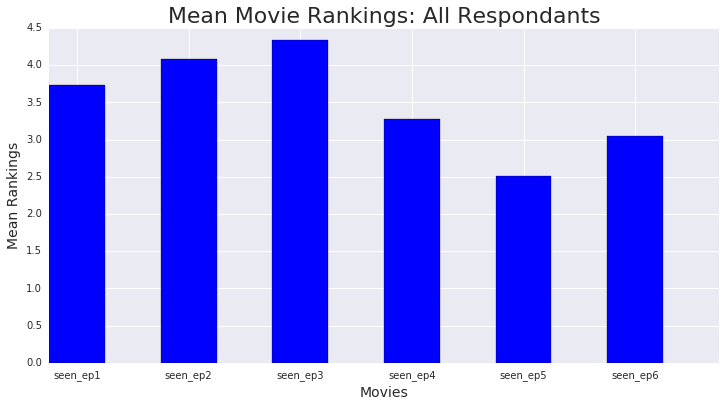

In [17]:
#Plotting all 'seen movie' data together
N = 6

# values of blue bars (height)
mean_bars = (mean_rankings)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.5       

# Plotting
plt.bar(ind, mean_bars, width, color='blue', label='Mean Rankings')

plt.xlabel('Movies', size=14)
plt.ylabel('Mean Rankings', size=14)
plt.title('Mean Movie Rankings: All Respondants', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width/2), ('seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6'))

plt.show()

## Takeaways from the rankings

Episode V: The Empire Strikes Back, is the highest ranked, followed by Episode VI and then Episode IV. Unsurprisingly, Episodes I-III are the lowest ranked. As a fan of the Star Wars series myself, and knowing the general reactions to the movies when they came out, I think the rankings from this survey make sense. Episodes I-III were highly anticipated but most Star Wars loyalists were disappointed and did not appreciate the deviations from the original movie styles and thought the movies to have too much politics and not enough humor. The original 3, Episodes IV-VI, have always been highly regarded amongst fans of the film franchise as the best in the series. Episode V introduces a lot of iconic characters and scenes, including Jabba the Hut and Boba Fett and the love triangle developing between 3 of the main characters, and that's what gives it a ranking boost over episode IV, which is more of an introduction into the main characters and storyline.

## Computing the sum of each 'seen' column

In [18]:
seen_sum = star_wars[star_wars.columns[3:9]].sum()
seen_sum


seen_ep1    673
seen_ep2    571
seen_ep3    550
seen_ep4    607
seen_ep5    758
seen_ep6    738
dtype: int64

## Making a bar chart of the sums of seen columns

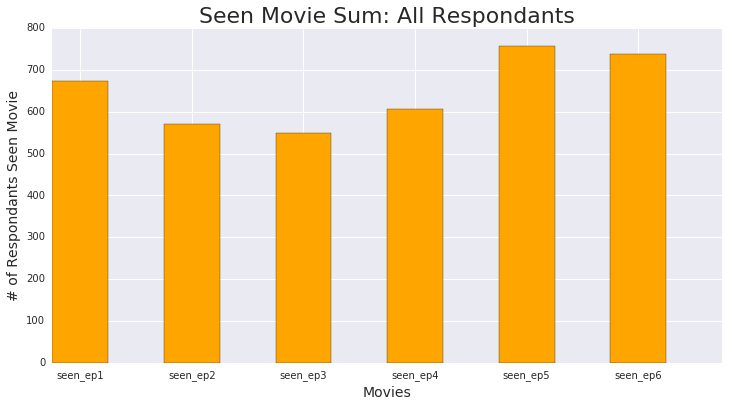

In [19]:
#Plotting all 'seen movie' data together
N = 6

# values of orange bars (height)
seen_bars = (seen_sum)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.5       

# Plotting
plt.bar(ind, seen_bars, width, color='orange', label='Seen Movie')

plt.xlabel('Movies', size=14)
plt.ylabel('# of Respondants Seen Movie', size=14)
plt.title('Seen Movie Sum: All Respondants', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width/2), ('seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6'))

plt.show()

## Takeaways from the sumations of seen movies

The sums of the 'seen_movie' columns are directly inverse from the rankings, and given that the lower the ranking the higher the rating of the movie, this makes sense. We can see that Episode V: The Empire Strikes Back, is the most watched movie in the series, and it is also the highest rated based on the mean rankings. We see that each sum of how many survey respondants watched each movie corresponds accordingly with how it's ranked. This could mean that ratings had a positive or negative effect on how many people watched each movie, or it could mean that the number of people that watched each movie has an effect on the ratings. I believe it makes more sense to say the former would be more influential than the latter, as the number of respondants shouldn't necessarily affect the rating, which is an average, as much as the ratings may influence the number of movie viewers, although both might play a role.

## Splitting the data by gender

In [20]:
sw_males = star_wars[star_wars["Gender"] == "Male"]
sw_females = star_wars[star_wars["Gender"] == "Female"]


## Star Wars movies seen and ranked split by gender

In [21]:
#How many males have seen each movie
checkbox_cols_m = [3,4,5,6,7,8]

for i in checkbox_cols_m:
    print (sw_males.columns[i])
    print (sw_males[sw_males.columns[i]].value_counts(dropna=False))
    print('\n')


seen_ep1
True     361
False    136
Name: seen_ep1, dtype: int64


seen_ep2
True     323
False    174
Name: seen_ep2, dtype: int64


seen_ep3
True     317
False    180
Name: seen_ep3, dtype: int64


seen_ep4
True     342
False    155
Name: seen_ep4, dtype: int64


seen_ep5
True     392
False    105
Name: seen_ep5, dtype: int64


seen_ep6
True     387
False    110
Name: seen_ep6, dtype: int64




In [22]:
#How many females have seen each movie
checkbox_cols_f = [3,4,5,6,7,8]

for i in checkbox_cols_f:
    print (sw_females.columns[i])
    print (sw_females[sw_females.columns[i]].value_counts(dropna=False))
    print('\n')


seen_ep1
True     298
False    251
Name: seen_ep1, dtype: int64


seen_ep2
False    312
True     237
Name: seen_ep2, dtype: int64


seen_ep3
False    327
True     222
Name: seen_ep3, dtype: int64


seen_ep4
False    294
True     255
Name: seen_ep4, dtype: int64


seen_ep5
True     353
False    196
Name: seen_ep5, dtype: int64


seen_ep6
True     338
False    211
Name: seen_ep6, dtype: int64




In [23]:
seen_sum_m = sw_males[sw_males.columns[3:9]].sum()
print (seen_sum_m)
print ('\n')

seen_sum_f = sw_females[sw_females.columns[3:9]].sum()
print (seen_sum_f)


seen_ep1    361
seen_ep2    323
seen_ep3    317
seen_ep4    342
seen_ep5    392
seen_ep6    387
dtype: int64


seen_ep1    298
seen_ep2    237
seen_ep3    222
seen_ep4    255
seen_ep5    353
seen_ep6    338
dtype: int64


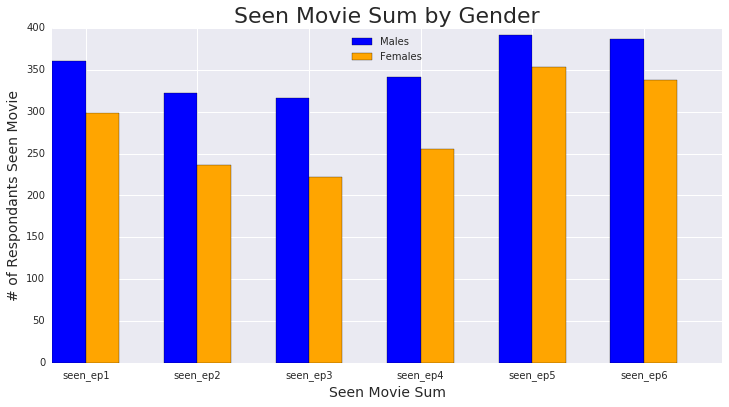

In [24]:
#Plotting male and female seen movie data together
N = 6

# values of blue bars (height)
seen_male = (seen_sum_m)
# values of orange bars (height)
seen_female = (seen_sum_f)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, seen_male, width, color='blue', label='Males')
plt.bar(ind + width, seen_female, width, color='orange', label='Females')

plt.xlabel('Seen Movie Sum', size=14)
plt.ylabel('# of Respondants Seen Movie', size=14)
plt.title('Seen Movie Sum by Gender', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width*2) / 2, ('seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

We can see there are generally more males who've seen each of the Star Wars films, but there is a narrower gap between male and female when it comes to Episode V followed by Episode VI.

## Charting mean ranking split by gender

In [25]:
mean_rankings_m = sw_males[sw_males.columns[9:15]].mean(skipna=True)
print (mean_rankings_m)
print ('\n')
mean_rankings_f = sw_females[sw_females.columns[9:15]].mean(skipna=True)
print (mean_rankings_f)


ranking_ep1    4.037825
ranking_ep2    4.224586
ranking_ep3    4.274882
ranking_ep4    2.997636
ranking_ep5    2.458629
ranking_ep6    3.002364
dtype: float64


ranking_ep1    3.429293
ranking_ep2    3.954660
ranking_ep3    4.418136
ranking_ep4    3.544081
ranking_ep5    2.569270
ranking_ep6    3.078086
dtype: float64


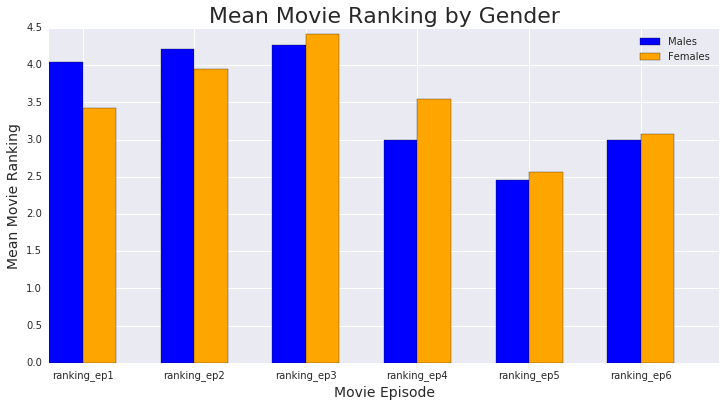

In [26]:
#Plotting male and female movie ranking data together
N = 6

# values of blue bars (height)
male_mean = (mean_rankings_m)
# values of orange bars (height)
female_mean = (mean_rankings_f)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, male_mean, width, color='blue', label='Males')
plt.bar(ind + width, female_mean, width, color='orange', label='Females')

plt.xlabel('Movie Episode', size=14)
plt.ylabel('Mean Movie Ranking', size=14)
plt.title('Mean Movie Ranking by Gender', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width*2) / 2, ('ranking_ep1', 'ranking_ep2', 'ranking_ep3', 'ranking_ep4', 'ranking_ep5', 'ranking_ep6'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

## Observations
While most of the rankings follow the same ranking order, we can see there is a difference in how males and females rated the movies in this survey. Both rate Episode V: The Empire Strikes Back as the best and the ranking is close when it comes to the split in gender. Episode VI is also close in ranking but while males equally ranked Episodes IV and VI, females ranked Episode VI higher than Episode IV. Females also rated Episodes I and II higher than males did, but liked Episode III even less than the male respondants. Again, we see that the seen columns directly correspond to the rankings, with the highest rated being the most seen and vice-versa.<br/>
<br/>
**Males movie ranking order:
Episode V<br/>
Episode IV & Episode VI<br/>
Episode I<br/>
Episode II<br/>
Episode III.<br/>
<br/>
Females movie ranking order: <br/>
Episode V<br/>
Episode VI<br/>
Episode I<br/>
Episode IV<br/>
Episode II<br/>
Episode III.**<br/>
<br/>

## Filtering the data by fans of the franchise vs. non-fans

In [27]:
# How many respondants are fans and how many are not?
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [28]:
sw_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
print (sw_fans.head())
print ('\n')
sw_nonfans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]
print (sw_nonfans.head())


   RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1          True                                               True              
4          True                                               True              
5          True                                               True              
6          True                                               True              
7          True                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
4                                               True                      
5                                               True                      
6                                               True                      
7                                               True                      

   seen_ep1  seen_ep2  seen_ep3  seen_ep4  seen_ep5  seen_ep6 

## Star Wars Fans seen and ranked Star Wars movies

In [29]:
#How many fans have seen each movie
checkbox_cols_fans = [3,4,5,6,7,8]

for i in checkbox_cols_fans:
    print (sw_fans.columns[i])
    print (sw_fans[sw_fans.columns[i]].value_counts(dropna=False))
    print('\n')

seen_ep1
True     500
False     52
Name: seen_ep1, dtype: int64


seen_ep2
True     463
False     89
Name: seen_ep2, dtype: int64


seen_ep3
True     450
False    102
Name: seen_ep3, dtype: int64


seen_ep4
True     483
False     69
Name: seen_ep4, dtype: int64


seen_ep5
True     538
False     14
Name: seen_ep5, dtype: int64


seen_ep6
True     537
False     15
Name: seen_ep6, dtype: int64




In [30]:
#How many non-fans have seen each movie
checkbox_cols_nfans = [3,4,5,6,7,8]

for i in checkbox_cols_nfans:
    print (sw_nonfans.columns[i])
    print (sw_nonfans[sw_nonfans.columns[i]].value_counts(dropna=False))
    print('\n')

seen_ep1
True     173
False    111
Name: seen_ep1, dtype: int64


seen_ep2
False    176
True     108
Name: seen_ep2, dtype: int64


seen_ep3
False    184
True     100
Name: seen_ep3, dtype: int64


seen_ep4
False    160
True     124
Name: seen_ep4, dtype: int64


seen_ep5
True     220
False     64
Name: seen_ep5, dtype: int64


seen_ep6
True     201
False     83
Name: seen_ep6, dtype: int64




In [31]:
seen_sum_fans = sw_fans[sw_fans.columns[3:9]].sum()
print (seen_sum_fans)
print ('\n')

seen_sum_nfans = sw_nonfans[sw_nonfans.columns[3:9]].sum()
print (seen_sum_nfans)


seen_ep1    500
seen_ep2    463
seen_ep3    450
seen_ep4    483
seen_ep5    538
seen_ep6    537
dtype: int64


seen_ep1    173
seen_ep2    108
seen_ep3    100
seen_ep4    124
seen_ep5    220
seen_ep6    201
dtype: int64


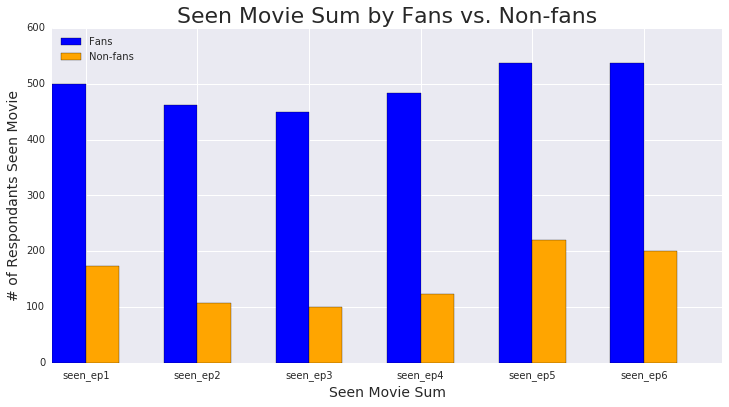

In [32]:
#Plotting fans and non-fans seen movie data together
N = 6

# values of blue bars (height)
seen_fans = (seen_sum_fans)
# values of orange bars (height)
seen_nonfans = (seen_sum_nfans)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, seen_fans, width, color='blue', label='Fans')
plt.bar(ind + width, seen_nonfans, width, color='orange', label='Non-fans')

plt.xlabel('Seen Movie Sum', size=14)
plt.ylabel('# of Respondants Seen Movie', size=14)
plt.title('Seen Movie Sum by Fans vs. Non-fans', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width*2) / 2, ('seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

There is a very obvious difference between fans and non-fans of the franchise when it comes to survey reponses. Fans more than double the amount of repondants who've seen the films vs. non-fans.

## Charting mean rankings of the movies by fans and non-fans

In [33]:
mean_rankings_fans = sw_fans[sw_fans.columns[9:15]].mean(skipna=True)
print (mean_rankings_fans)
print ('\n')
mean_rankings_nfans = sw_nonfans[sw_nonfans.columns[9:15]].mean(skipna=True)
print (mean_rankings_nfans)


ranking_ep1    4.141304
ranking_ep2    4.342391
ranking_ep3    4.417423
ranking_ep4    2.932971
ranking_ep5    2.333333
ranking_ep6    2.829710
dtype: float64


ranking_ep1    2.936396
ranking_ep2    3.591549
ranking_ep3    4.193662
ranking_ep4    3.933099
ranking_ep5    2.862676
ranking_ep6    3.471831
dtype: float64


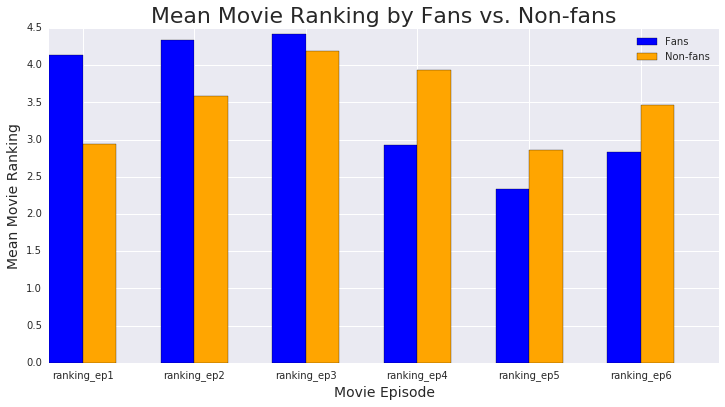

In [34]:
#Plotting fans vs. nonfans movie ranking data together
N = 6

# values of blue bars (height)
mean_fans = (mean_rankings_fans)
# values of orange bars (height)
mean_nonfans = (mean_rankings_nfans)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, mean_fans, width, color='blue', label='Fans')
plt.bar(ind + width, mean_nonfans, width, color='orange', label='Non-fans')

plt.xlabel('Movie Episode', size=14)
plt.ylabel('Mean Movie Ranking', size=14)
plt.title('Mean Movie Ranking by Fans vs. Non-fans', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width*2) / 2, ('ranking_ep1', 'ranking_ep2', 'ranking_ep3', 'ranking_ep4', 'ranking_ep5', 'ranking_ep6'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

Again we see a big difference in the way fans and non-fans of the Star Wars films responded in the survey. Here we see that the ranking order for the films differs for the two subsets. The few constants have been that Episode V is consistantly ranked the best and Episode III consistantly ranked the worst.<br/>
<br/>
**Non-fans rank the films in the following order: <br/>
Episode V<br/>
Episode I<br/>
Episode VI<br/>
Episode II<br/>
Episode IV<br/>
Episode III.<br/>
<br/>
Fans rank the films in the following order: <br/>
Episode V<br/>
Episode VI<br/>
Episode IV<br/>
Episode I<br/>
Episode II<br/>
Episode III.**<br/>
<br/>
The fans of the franchise are clearly loyalists to the original 3 movies and did not like the deviations in Episodes I-III which were released much later in the year 2000s. Meanwhile, non-fans of the franchise who rated the movies tended to be more forgiving of the newer movies and did not like the first movie in the original series as much.

## Segmenting the data based on 'Which character shot first?'

In [35]:
print (star_wars['Which character shot first?'].value_counts(dropna=False))


NaN                                 358
Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64


In [36]:
character_map = {
    "Han": True,
    "Greedo": False,
    "I don't understand this question": np.NaN
}

star_wars['Which character shot first?'] = star_wars['Which character shot first?'].map(character_map)
print(star_wars['Which character shot first?'].value_counts(dropna=False))


NaN      664
True     325
False    197
Name: Which character shot first?, dtype: int64


In [37]:
han = star_wars[star_wars['Which character shot first?'] == True]
greedo = star_wars[star_wars['Which character shot first?'] == False]
print (han.head())
print ('\n')
print (greedo.head())


    RespondentID  \
6           True   
7           True   
8           True   
9           True   
15          True   

    Have you seen any of the 6 films in the Star Wars franchise?  \
6                                                True              
7                                                True              
8                                                True              
9                                                True              
15                                               True              

   Do you consider yourself to be a fan of the Star Wars film franchise?  \
6                                                True                      
7                                                True                      
8                                                True                      
9                                                True                      
15                                               True                      

    seen_ep1 

## Seen movie data based on which character shot first

In [38]:
seen_sum_han = han[han.columns[3:9]].sum()
print (seen_sum_han)
print ('\n')

seen_sum_greedo = greedo[greedo.columns[3:9]].sum()
print (seen_sum_greedo)


seen_ep1    283
seen_ep2    265
seen_ep3    260
seen_ep4    287
seen_ep5    313
seen_ep6    311
dtype: int64


seen_ep1    173
seen_ep2    150
seen_ep3    144
seen_ep4    156
seen_ep5    179
seen_ep6    179
dtype: int64


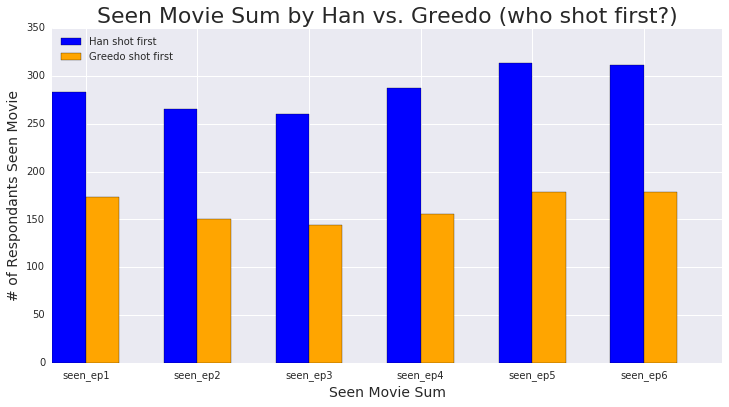

In [39]:
#Plotting Han and Greedo (who shot first?) seen movie data together
N = 6

# values of blue bars (height)
seen_hanfirst = (seen_sum_han)
# values of orange bars (height)
seen_greedofirst = (seen_sum_greedo)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, seen_hanfirst, width, color='blue', label='Han shot first')
plt.bar(ind + width, seen_greedofirst, width, color='orange', label='Greedo shot first')

plt.xlabel('Seen Movie Sum', size=14)
plt.ylabel('# of Respondants Seen Movie', size=14)
plt.title('Seen Movie Sum by Han vs. Greedo (who shot first?)', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width*2) / 2, ('seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

Nearly twice as many respondants said they believe Han shot first rather than Greedo. More than half the respondants either didn't respond or said they didn't understand the question (I left those out of this particular analysis). <br/>
<br/>
**'Han shot first' group's seen movies in order of most to least seen: <br/>
Episode V<br/>
Episode VI<br/>
Episode IV<br/> 
Episode I<br/> 
Episode II<br/>
Episode III <br/>
<br/>
'Greedo shot first' group's seen movies in order of most to least seen: <br/>
Episode V and Episode VI <br/>
Episode I <br/>
Episode IV <br/>
Episode II <br/>
Episode III**

## Charting mean rankings for the movies based on which character shot first

In [40]:
mean_rankings_han = han[han.columns[9:15]].mean(skipna=True)
print (mean_rankings_han)
print ('\n')
mean_rankings_greedo = greedo[greedo.columns[9:15]].mean(skipna=True)
print (mean_rankings_greedo)


ranking_ep1    4.295385
ranking_ep2    4.298462
ranking_ep3    4.385802
ranking_ep4    2.769231
ranking_ep5    2.332308
ranking_ep6    2.913846
dtype: float64


ranking_ep1    3.857868
ranking_ep2    4.238579
ranking_ep3    4.426396
ranking_ep4    3.101523
ranking_ep5    2.370558
ranking_ep6    3.005076
dtype: float64


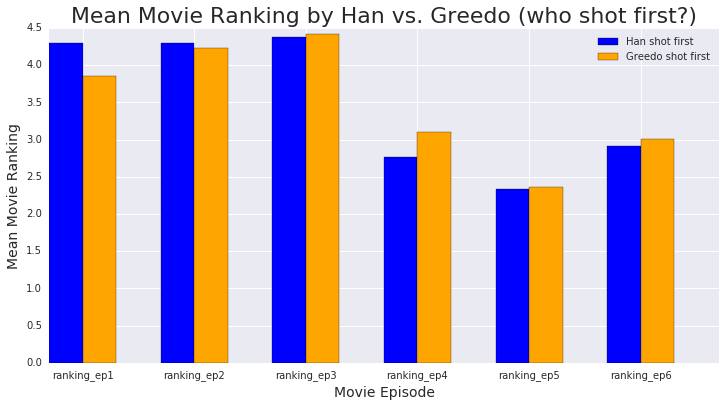

In [41]:
#Plotting Han and Greedo (who shot first?) movie ranking data together
N = 6

# values of blue bars (height)
mean_hanfirst = (mean_rankings_han)
# values of orange bars (height)
mean_greedofirst = (mean_rankings_greedo)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, mean_hanfirst, width, color='blue', label='Han shot first')
plt.bar(ind + width, mean_greedofirst, width, color='orange', label='Greedo shot first')

plt.xlabel('Movie Episode', size=14)
plt.ylabel('Mean Movie Ranking', size=14)
plt.title('Mean Movie Ranking by Han vs. Greedo (who shot first?)', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width*2) / 2, ('ranking_ep1', 'ranking_ep2', 'ranking_ep3', 'ranking_ep4', 'ranking_ep5', 'ranking_ep6'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

The differences in the movie rankings by the 'Which character shot first?' subsets are not very different. What is interesting however, is that this is the first time we see the rankings differ from the order of most to least seen for any of the subsets. <br/>
<br/>
**'Han shot first' group's ranked movies in order of best to worst: <br/>
Episode V<br/>
Episode IV<br/>
Episode VI<br/> 
Episode I<br/> 
Episode II<br/>
Episode III <br/>
<br/>
'Greedo shot first' group's ranked movies in order of best to worst <br/>
Episode V<br/>
Episode VI <br/>
Episode IV <br/>
Episode I <br/>
Episode II <br/>
Episode III**<br/>
<br/>
We can see that the only difference in the rankings is that Han fans ranked Episode IV over Episode VI and Greedo fans ranked those vice-versa.

## Segmenting the data based on respondants' Education

In [42]:
print(star_wars['Education'].value_counts(dropna=False))


Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64


In [43]:
#cleaning the values so they're easier to work with
star_wars['Education'] = star_wars['Education'].str.replace(' degree', '')
star_wars['Education'] = star_wars['Education'].dropna()
edu_value_counts = (star_wars['Education'].value_counts())
print (edu_value_counts)

Some college or Associate    328
Bachelor                     321
Graduate                     275
High school                  105
Less than high school          7
Name: Education, dtype: int64


In [44]:
#removing 'Less than high school' since it has too few respondants to analyze
to_remove = star_wars['Education'] == 'Less than high school'
star_wars['Education'] = star_wars['Education'][~to_remove]
edu_value_counts = (star_wars['Education'].value_counts())
print (edu_value_counts)


Some college or Associate    328
Bachelor                     321
Graduate                     275
High school                  105
Name: Education, dtype: int64


In [45]:
#filtering the data by each education level
sw_edu_some = star_wars[star_wars['Education'] == 'Some college or Associate']
sw_edu_bach = star_wars[star_wars['Education'] == 'Bachelor']
sw_edu_grad = star_wars[star_wars['Education'] == 'Graduate']
sw_edu_hs = star_wars[star_wars['Education'] == 'High school']


In [46]:
#summing the seen movie columns by each education level subset
seen_sum_sw_edu_some = sw_edu_some[sw_edu_some.columns[3:9]].sum()
print (seen_sum_sw_edu_some)
print ('\n')
seen_sum_sw_edu_bach = sw_edu_bach[sw_edu_bach.columns[3:9]].sum()
print (seen_sum_sw_edu_bach)
print ('\n')
seen_sum_sw_edu_grad = sw_edu_grad[sw_edu_grad.columns[3:9]].sum()
print (seen_sum_sw_edu_grad)
print ('\n')
seen_sum_sw_edu_hs = sw_edu_hs[sw_edu_hs.columns[3:9]].sum()
print (seen_sum_sw_edu_hs)
print ('\n')


seen_ep1    211
seen_ep2    186
seen_ep3    183
seen_ep4    180
seen_ep5    227
seen_ep6    223
dtype: int64


seen_ep1    206
seen_ep2    170
seen_ep3    163
seen_ep4    195
seen_ep5    243
seen_ep6    234
dtype: int64


seen_ep1    179
seen_ep2    149
seen_ep3    139
seen_ep4    163
seen_ep5    207
seen_ep6    201
dtype: int64


seen_ep1    57
seen_ep2    48
seen_ep3    48
seen_ep4    53
seen_ep5    61
seen_ep6    60
dtype: int64




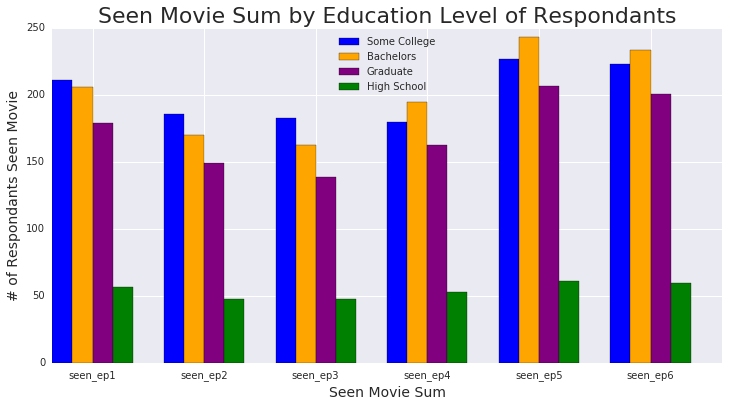

In [47]:
#Plotting seen movie data by Education level of respondants
N = 6

# values of blue bars (height)
seen_somecollege = (seen_sum_sw_edu_some)
# values of orange bars (height)
seen_bachelors = (seen_sum_sw_edu_bach)
# values of purple bars (height)
seen_grad = (seen_sum_sw_edu_grad)
# values of green bars (height)
seen_hs = (seen_sum_sw_edu_hs)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.18       

# Plotting
plt.bar(ind, seen_somecollege, width, color='blue', label='Some College')
plt.bar(ind + width, seen_bachelors, width, color='orange', label='Bachelors')
plt.bar(ind + width * 2, seen_grad, width, color='purple', label='Graduate')
plt.bar(ind + width * 3, seen_hs, width, color='green', label='High School')


plt.xlabel('Seen Movie Sum', size=14)
plt.ylabel('# of Respondants Seen Movie', size=14)
plt.title('Seen Movie Sum by Education Level of Respondants', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width*2), ('seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In general there are far less respondants who have only graduated high school (or less) than any of the higher education respondants so that's a major reason for the discrepancy we see in the above chart. It would be interesting to see this as a percentage vs. just amounts.

In [48]:
#calculating percentage of seen movie columns by education level subsets
per_seen_by_edu_some = (seen_sum_sw_edu_some / edu_value_counts[0]) *100
print (per_seen_by_edu_some)
print ('\n')

per_seen_by_edu_bach = (seen_sum_sw_edu_bach / edu_value_counts[1]) *100
print (per_seen_by_edu_bach)
print ('\n')

per_seen_by_edu_grad = (seen_sum_sw_edu_grad / edu_value_counts[2]) *100
print (per_seen_by_edu_grad)
print ('\n')

per_seen_by_edu_hs = (seen_sum_sw_edu_hs / edu_value_counts[3]) *100
print (per_seen_by_edu_hs)
print ('\n')



seen_ep1    64.329268
seen_ep2    56.707317
seen_ep3    55.792683
seen_ep4    54.878049
seen_ep5    69.207317
seen_ep6    67.987805
dtype: float64


seen_ep1    64.174455
seen_ep2    52.959502
seen_ep3    50.778816
seen_ep4    60.747664
seen_ep5    75.700935
seen_ep6    72.897196
dtype: float64


seen_ep1    65.090909
seen_ep2    54.181818
seen_ep3    50.545455
seen_ep4    59.272727
seen_ep5    75.272727
seen_ep6    73.090909
dtype: float64


seen_ep1    54.285714
seen_ep2    45.714286
seen_ep3    45.714286
seen_ep4    50.476190
seen_ep5    58.095238
seen_ep6    57.142857
dtype: float64




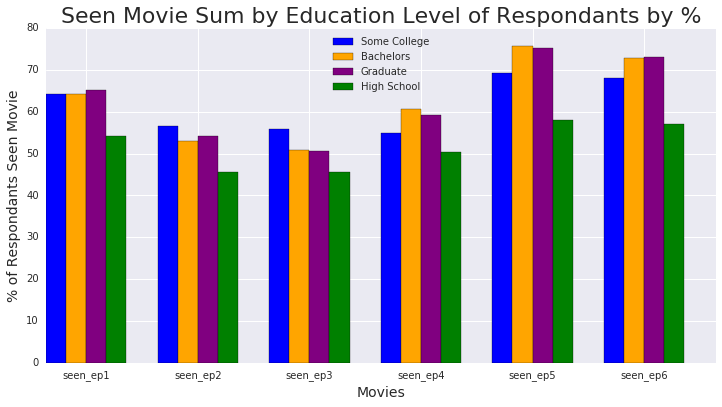

In [49]:
#Plotting seen movie data by Education level of respondants by percentage
N = 6

# values of blue bars (height)
seenper_somecollege = (per_seen_by_edu_some)
# values of orange bars (height)
seenper_bachelors = (per_seen_by_edu_bach)
# values of purple bars (height)
seenper_grad = (per_seen_by_edu_grad)
# values of green bars (height)
seenper_hs = (per_seen_by_edu_hs)


# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.18       

# Plotting
plt.bar(ind, seenper_somecollege, width, color='blue', label='Some College')
plt.bar(ind + width, seenper_bachelors, width, color='orange', label='Bachelors')
plt.bar(ind + width * 2, seenper_grad, width, color='purple', label='Graduate')
plt.bar(ind + width * 3, seenper_hs, width, color='green', label='High School')

plt.xlabel('Movies', size=14)
plt.ylabel('% of Respondants Seen Movie', size=14)
plt.title('Seen Movie Sum by Education Level of Respondants by %', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width * 2, ('seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

What's interesting about the above chart is that respondants with a Bachelor or Graduate degree have a higher rate of having seen Episodes V, VI, and IV (respectively), but that seems to drop off pretty drastically after Episode I (in which they are neck and neck with the respondants with 'Some college or associates degree'). Here, again, we see that Episode V has been seen the most by each subset. We can also see there is a lower overall rate of respondants who have High School level education or less who've seen the movies generally.

## Charting mean ranking for the movies based on education levels of respondants

In [50]:
#calculating mean rankings of movies by education level subsets
mean_rankings_edu_some = sw_edu_some[sw_edu_some.columns[9:15]].mean(skipna=True)
print (mean_rankings_edu_some)
print ('\n')
mean_rankings_edu_bach = sw_edu_bach[sw_edu_bach.columns[9:15]].mean(skipna=True)
print (mean_rankings_edu_bach)
print ('\n')
mean_rankings_edu_grad = sw_edu_grad[sw_edu_grad.columns[9:15]].mean(skipna=True)
print (mean_rankings_edu_grad)
print ('\n')
mean_rankings_edu_hs = sw_edu_hs[sw_edu_hs.columns[9:15]].mean(skipna=True)
print (mean_rankings_edu_hs)
print ('\n')


ranking_ep1    3.551181
ranking_ep2    3.885827
ranking_ep3    4.102362
ranking_ep4    3.503937
ranking_ep5    2.783465
ranking_ep6    3.173228
dtype: float64


ranking_ep1    3.828244
ranking_ep2    4.290076
ranking_ep3    4.521073
ranking_ep4    3.114504
ranking_ep5    2.309160
ranking_ep6    2.931298
dtype: float64


ranking_ep1    3.822222
ranking_ep2    4.225664
ranking_ep3    4.500000
ranking_ep4    3.199115
ranking_ep5    2.323009
ranking_ep6    2.920354
dtype: float64


ranking_ep1    3.802817
ranking_ep2    3.746479
ranking_ep3    4.126761
ranking_ep4    3.211268
ranking_ep5    2.873239
ranking_ep6    3.239437
dtype: float64




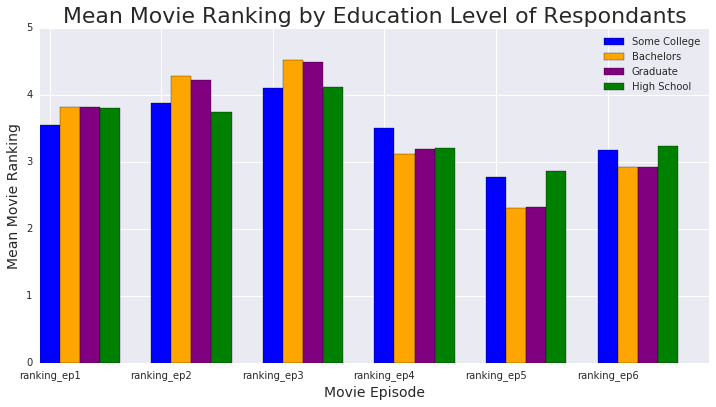

In [51]:
#Plotting movie ranking data by education levels of respondants
N = 6

# values of blue bars (height)
mean_somecollege = (mean_rankings_edu_some)
# values of orange bars (height)
mean_bachelors = (mean_rankings_edu_bach)
# values of purple bars (height)
mean_grad = (mean_rankings_edu_grad)
# values of green bars (height)
mean_hs = (mean_rankings_edu_hs)


# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.18       

# Plotting
plt.bar(ind, mean_somecollege, width, color='blue', label='Some College')
plt.bar(ind + width, mean_bachelors, width, color='orange', label='Bachelors')
plt.bar(ind + width * 2, mean_grad, width, color='purple', label='Graduate')
plt.bar(ind + width * 3, mean_hs, width, color='green', label='High School')


plt.xlabel('Movie Episode', size=14)
plt.ylabel('Mean Movie Ranking', size=14)
plt.title('Mean Movie Ranking by Education Level of Respondants', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('ranking_ep1', 'ranking_ep2', 'ranking_ep3', 'ranking_ep4', 'ranking_ep5', 'ranking_ep6'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

Once again, we see that every subset ranked Episode V: The Empire Strikes Back as the best movie of the series. Here, as we've seen before, Episodes VI and IV fall close behind Episode V and then Episodes I, II, and III come after that respectively. There isn't much deviation here between the subsets and we can exclude the 'Less than 

## Cleaning up columns 15-29 about character favorability

In [52]:
#Looking into columns 15-29
character_cols = [15,16,17,18,19,20,21,22,23,24,25,26,27,28]

for i in character_cols:
    print (star_wars.columns[i])
    print (star_wars[star_wars.columns[i]].value_counts(dropna=False))
    print('\n')

Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64


Unnamed: 16
Very favorably                                 552
NaN                                            355
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Unnamed: 16, dtype: int6

Since the value counts don't give us the character names, let's look at the headings we separated out earlier.

In [53]:
#Looking into the headings for columns 15-28

print (headings[15:29])

Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.                Han Solo
Unnamed: 16                                                                                                             Luke Skywalker
Unnamed: 17                                                                                                       Princess Leia Organa
Unnamed: 18                                                                                                           Anakin Skywalker
Unnamed: 19                                                                                                             Obi Wan Kenobi
Unnamed: 20                                                                                                          Emperor Palpatine
Unnamed: 21                                                                                                                Darth Vader
Unnamed: 22                                            

In [54]:
#Cleaning the answers for readability

answer_map = {'Very favorably': 'love',
             'Somewhat favorably': 'like',
             'Neither favorably nor unfavorably (neutral)': 'Neutral',
             'Somewhat unfavorably': 'dislike',
             'Unfamiliar (N/A)': 'Unfamiliar',
             'Very unfavorably': 'hate',
             }
char_map = {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
            'Unnamed: 16': 'Luke Skywalker',
            'Unnamed: 17': 'Princess Leia Organa',
            'Unnamed: 18': 'Anakin Skywalker',
            'Unnamed: 19': 'Obi Wan Kenobi',
            'Unnamed: 20': 'Emperor Palpatine',
            'Unnamed: 21': 'Darth Vader',
            'Unnamed: 22': 'Lando Calrissian',
            'Unnamed: 23': 'Boba Fett',
            'Unnamed: 24': 'C-3P0',
            'Unnamed: 25': 'R2 D2',
            'Unnamed: 26': 'Jar Jar Binks',
            'Unnamed: 27': 'Padme Amidala',
            'Unnamed: 28': 'Yoda'}
    
for i in character_cols:
    star_wars[star_wars.columns[i]] = star_wars[star_wars.columns[i]].map(answer_map)
    star_wars.rename(mapper=char_map, axis=1, inplace=True)
    print (star_wars[star_wars.columns[i]].value_counts())
    print ('\n')


love          610
like          151
Neutral        44
Unfamiliar     15
dislike         8
hate            1
Name: Han Solo, dtype: int64


love          552
like          219
Neutral        38
dislike        13
Unfamiliar      6
hate            3
Name: Luke Skywalker, dtype: int64


love          547
like          210
Neutral        48
dislike        12
Unfamiliar      8
hate            6
Name: Princess Leia Organa, dtype: int64


like          269
love          245
Neutral       135
dislike        83
Unfamiliar     52
hate           39
Name: Anakin Skywalker, dtype: int64


love          591
like          159
Neutral        43
Unfamiliar     17
dislike         8
hate            7
Name: Obi Wan Kenobi, dtype: int64


Neutral       213
Unfamiliar    156
like          143
hate          124
love          110
dislike        68
Name: Emperor Palpatine, dtype: int64


love          310
like          171
hate          149
dislike       102
Neutral        84
Unfamiliar     10
Name: Darth Vader

In [55]:
#separating each character into their own object and separating only 'love' values
han_solo = (star_wars['Han Solo'])
han_love = (len(han_solo[han_solo == 'love']))
print (han_love)
print ('\n')

luke = (star_wars['Luke Skywalker'])
luke_love = (len(luke[luke == 'love']))
print (luke_love)
print ('\n')

leia = (star_wars['Princess Leia Organa'])
leia_love = (len(leia[leia == 'love']))
print (leia_love)
print ('\n')

anakin = (star_wars['Anakin Skywalker'])
anakin_love = (len(anakin[anakin == 'love']))
print (anakin_love)
print ('\n')

obi_wan = (star_wars['Obi Wan Kenobi'])
obi_love = (len(obi_wan[obi_wan == 'love']))
print (obi_love)
print ('\n')

palpatine = (star_wars['Emperor Palpatine'])
palpatine_love = (len(palpatine[palpatine == 'love']))
print (palpatine_love)
print ('\n')

vader = (star_wars['Darth Vader'])
vader_love = (len(vader[vader == 'love']))
print (vader_love)
print ('\n')

lando = (star_wars['Lando Calrissian'])
lando_love = (len(lando[lando == 'love']))
print (lando_love)
print ('\n')

boba = (star_wars['Boba Fett'])
boba_love = (len(boba[boba == 'love']))
print (boba_love)
print ('\n')

c3p0 = (star_wars['C-3P0'])
c3p0_love = (len(c3p0[c3p0 == 'love']))
print (c3p0_love)
print ('\n')

r2d2 = (star_wars['R2 D2'])
r2d2_love = (len(r2d2[r2d2 == 'love']))
print (r2d2_love)
print ('\n')

jarjar = (star_wars['Jar Jar Binks'])
jarjar_love = (len(jarjar[jarjar == 'love']))
print (jarjar_love)
print ('\n')

padme = (star_wars['Padme Amidala'])
padme_love = (len(padme[padme == 'love']))
print (padme_love)
print ('\n')

yoda = (star_wars['Yoda'])
yoda_love = (len(yoda[yoda == 'love']))
print (yoda_love)
print ('\n')

characters_love = [han_love, luke_love, leia_love, anakin_love, obi_love, palpatine_love, vader_love,
                  lando_love, boba_love, c3p0_love, r2d2_love, jarjar_love, padme_love, yoda_love]
print (characters_love)

610


552


547


245


591


110


310


142


138


474


562


112


168


605


[610, 552, 547, 245, 591, 110, 310, 142, 138, 474, 562, 112, 168, 605]


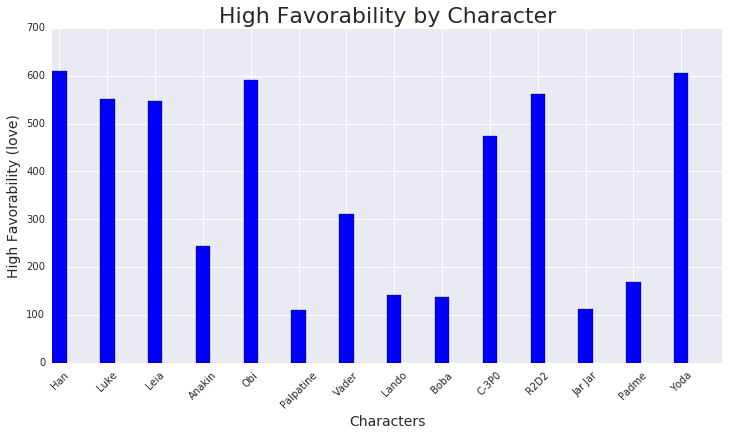

In [56]:
#Plotting characters by love (highly favorable)
N = 14

# values of blue bars (height)
character_love_bar = (characters_love)


# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, character_love_bar, width, color='blue')


plt.xlabel('Characters', size=14)
plt.ylabel('High Favorability (love)', size=14)
plt.title('High Favorability by Character', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Han', 'Luke', 'Leia', 'Anakin', 'Obi', 'Palpatine', 'Vader',
          'Lando', 'Boba', 'C-3P0', 'R2D2', 'Jar Jar', 'Padme', 'Yoda'), rotation='45')

# Show plot
plt.show()

Unsurprisingly, Han Solo and Yoda are the top 2 most liked (highly favorable) characters. Obi-Wan Kenobi and R2D2 follow them in likeability, which is also not surprising as these are 4 of the most iconic and likeable characters in the franchise. What is a bit surprising is that JarJar Binks is the 2nd least loved character, just slightly above Emperor Palpatine - who is the biggest villain in the franchise.

## Looking at characters by 'hate' responses

In [57]:
#separating each character into their own object and separating only 'love' values
han_solo = (star_wars['Han Solo'])
han_hate = (len(han_solo[han_solo == 'hate']))
print (han_hate)
print ('\n')

luke = (star_wars['Luke Skywalker'])
luke_hate = (len(luke[luke == 'hate']))
print (luke_hate)
print ('\n')

leia = (star_wars['Princess Leia Organa'])
leia_hate = (len(leia[leia == 'hate']))
print (leia_hate)
print ('\n')

anakin = (star_wars['Anakin Skywalker'])
anakin_hate = (len(anakin[anakin == 'hate']))
print (anakin_hate)
print ('\n')

obi_wan = (star_wars['Obi Wan Kenobi'])
obi_hate = (len(obi_wan[obi_wan == 'hate']))
print (obi_hate)
print ('\n')

palpatine = (star_wars['Emperor Palpatine'])
palpatine_hate = (len(palpatine[palpatine == 'hate']))
print (palpatine_hate)
print ('\n')

vader = (star_wars['Darth Vader'])
vader_hate = (len(vader[vader == 'hate']))
print (vader_hate)
print ('\n')

lando = (star_wars['Lando Calrissian'])
lando_hate = (len(lando[lando == 'hate']))
print (lando_hate)
print ('\n')

boba = (star_wars['Boba Fett'])
boba_hate = (len(boba[boba == 'hate']))
print (boba_hate)
print ('\n')

c3p0 = (star_wars['C-3P0'])
c3p0_hate = (len(c3p0[c3p0 == 'hate']))
print (c3p0_hate)
print ('\n')

r2d2 = (star_wars['R2 D2'])
r2d2_hate = (len(r2d2[r2d2 == 'hate']))
print (r2d2_hate)
print ('\n')

jarjar = (star_wars['Jar Jar Binks'])
jarjar_hate = (len(jarjar[jarjar == 'hate']))
print (jarjar_hate)
print ('\n')

padme = (star_wars['Padme Amidala'])
padme_hate = (len(padme[padme == 'hate']))
print (padme_hate)
print ('\n')

yoda = (star_wars['Yoda'])
yoda_hate = (len(yoda[yoda == 'hate']))
print (yoda_hate)
print ('\n')

characters_hate = [han_hate, luke_hate, leia_hate, anakin_hate, obi_hate, palpatine_hate, vader_hate,
                  lando_hate, boba_hate, c3p0_hate, r2d2_hate, jarjar_hate, padme_hate, yoda_hate]
print (characters_hate)


1


3


6


39


7


124


149


8


45


7


6


204


34


8


[1, 3, 6, 39, 7, 124, 149, 8, 45, 7, 6, 204, 34, 8]


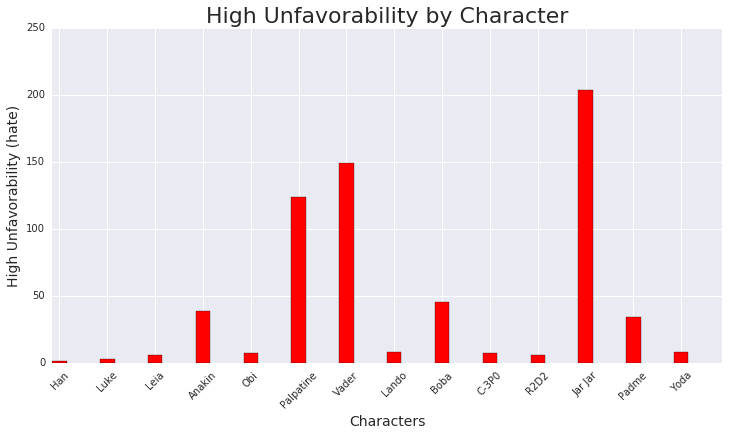

In [58]:
#Plotting characters by hate (highly unfavorable)
N = 14

# values of blue bars (height)
character_hate_bar = (characters_hate)


# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, character_hate_bar, width, color='red')


plt.xlabel('Characters', size=14)
plt.ylabel('High Unfavorability (hate)', size=14)
plt.title('High Unfavorability by Character', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Han', 'Luke', 'Leia', 'Anakin', 'Obi', 'Palpatine', 'Vader',
          'Lando', 'Boba', 'C-3P0', 'R2D2', 'Jar Jar', 'Padme', 'Yoda'), rotation='45')

# Show plot
plt.show()

Surprisingly, JarJar Binks beats out Emporer Palpatine as the most hated (most unfavorable) character out of the 14 characters in the survey. Also surprising is how many people hate Boba Fett, who is usually known as a fan favorite.

The most controversial character according to these two charts, is Darth Vader. He has a fairly high favorablitity with 310 responses, and also a fairly high unfavorability with 149 responses. As Vader is one of the most complex characters in the franchise, having started out on the right path as Anakin Skywalker, then turning to the dark side as he grew more angry and hateful, only to then reveal himself to his son and somehow redeam himself before his death, it stands to reason that survey respondants would be the most split on whether they love or hate him. He is also known as a "badass" type of character, which many admire, and that also explains the fairly high amount of love that this villain got here.

# Conclusions based on survey data analysis

### I. Based on the above findings, I think it's safe to say that Episode V: The Empire Strikes Back is the clear favorite of the Star Wars film franchise (Episodes I-VI).<br/>
* Amongst every subgroup analysed in this study: male, female, fans of the films, non-fans of the films, which character shot first answers, and education levels of respondants, as well as the overall analysis, and we found that Episode V was consistantly ranked the best. 
* We also concluded that Episode III: Revenge of the Sith was consistantly ranked the worst of the 6 films. <br/>

### II. Some of the other interesting findings from this study are: 
* More males than females watched the films <br/>
* Males and females ranked the movies differently except for the best and worst in their rankings
* Females were more fond of some of the newer films (episode I and episode II) and didn't like the original Episode IV as much as males
* Males tend to be loyalists to the original three movies and ranked the newer three (episodes I, II, III respectively) last
* Fans of the franchise are loyalists to the original three films (Episodes IV-VI) and did not like the newer films as much (Episodes I-III)<br/>
* Non-fans did not like Episode IV as much as fans did and ranked Episodes I and II higher than fans ranked them. <br/>
* While education level did not seem to affect ranking of movies, we saw that respondants with higher than high school level education were more likely to have seen the movies in general. <br/>

### III. As far as the characters, there isn't much surprise in who's most and least favorable, except that JarJar Binks is even less favorable than the most evil villain in the franchise: Emporer Palpatine. 
* The most favorable are Han Solo, followed closely by Yoda who are both known fan favorites. <br/>
* The least favorable is JarJar Binks, followed by Emporer Palpatine. <br/>
* The most controversial character is Darth Vader with the most split vote of favorability